   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


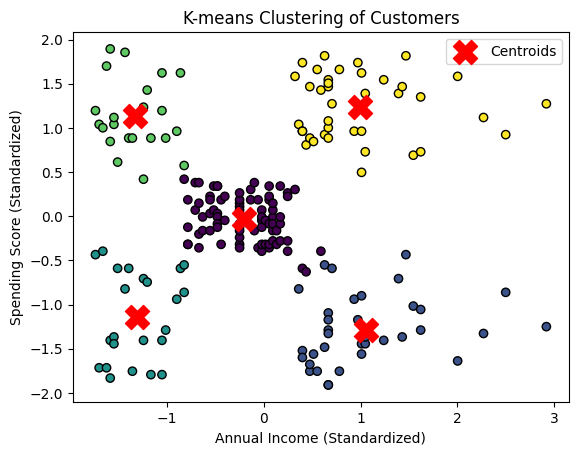

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        2
1           2                  15                      81        3
2           3                  16                       6        2
3           4                  16                      77        3
4           5                  17                      40        2


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "/content/Mall_Customers.csv"
# Assuming you've downloaded the dataset and have it in the current directory
# Replace 'Mall_Customers.csv' with the correct file name if necessary
df = pd.read_csv("/content/archive (2).zip")

# Display the first few rows of the dataset
print(df.head())

# Select features for clustering (assuming 'Annual Income' and 'Spending Score' for this example)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can adjust this based on your understanding of the data)
num_clusters = 5

# Create a K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the standardized features
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('K-means Clustering of Customers')
plt.legend()
plt.show()

# Display the cluster assignments in the original dataset
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())
